In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DeepFashion/'Category and Attribute Prediction Benchmark'/Img/img.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: img/Woven_Dolphin_Shorts/img_00000027.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000028.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000029.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000030.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000031.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000032.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000033.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000034.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000035.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000036.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000037.jpg  
   creating: img/Woven_Drawstring_Joggers/
  inflating: img/Woven_Drawstring_Joggers/img_00000001.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000002.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000003.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000004.jpg  
  inflating: img/Woven_Draw

In [ ]:
import os
import pandas as pd
import numpy as np, collections
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/yolov5_format.csv')
df.rename(columns= {'Unnamed: 0': 'path'}, inplace=True)

In [ ]:
# 32, 3, 41

In [ ]:
df_only_dress = df.loc[df['Label'] == 41]
df_2000_dress = df_only_dress[0: 2000].copy()

df_only_jeans = df.loc[df['Label'] == 25]
df_2000_jeans = df_only_jeans[0: 2000].copy()

df_only_blouse = df.loc[df['Label'] == 3]
df_2000_blouse = df_only_blouse[0: 2000].copy()

df_only_shorts = df.loc[df['Label'] == 32]
df_2000_shorts = df_only_shorts[0: 2000].copy()

In [ ]:
def change_label(label):
    new_labels = {32: 0, 3: 1, 41:2, 25:3}
    return new_labels[label]

df_concat = pd.concat([df_2000_shorts, df_2000_blouse, df_2000_dress, df_2000_jeans])
df_concat['Label'] = df_concat['Label'].apply(change_label)

In [ ]:
df_concat_train, df_concat_test = train_test_split(df_concat, test_size=0.2, random_state=20)

In [ ]:
df_concat_train

,path,Label,x_center,y_center,width,height
199457,img/Off-the-Shoulder_Maxi_Dress/img_00000039.jpg,2,0.445000,0.573333,0.580000,0.853333
350,img/Shirred_Floral-Embroidered_Blouse/img_0000...,1,0.523333,0.528333,0.460000,0.443333
2095,img/Split-Neck_Chiffon_Blouse/img_00000051.jpg,1,0.535294,0.447727,0.847059,0.759091
143525,img/Luxe_Voyager_Shorts/img_00000027.jpg,0,0.480687,0.431667,0.952790,0.483333
2091,img/Split-Neck_Chiffon_Blouse/img_00000047.jpg,1,0.592683,0.563333,0.414634,0.773333
...,...,...,...,...,...,...
201408,img/Watercolor_Rose_Print_Dress/img_00000062.jpg,2,0.519068,0.506826,0.961864,0.761092
2084,img/Split-Neck_Chiffon_Blouse/img_00000040.jpg,1,0.468889,0.523256,0.768889,0.887043
144449,img/Linen-Blend_Drawstring_Shorts/img_00000046...,0,0.506944,0.551667,0.328704,0.276667
199039,img/Origami_Crepe_Dress/img_00000038.jpg,2,0.558011,0.458472,0.585635,0.677741


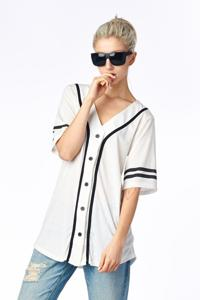

In [ ]:
caminho = df.loc[df['Label'] == 12].values[50][0]

imagem = cv2.imread(caminho)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

def convert_from_cv2_to_image(img: np.ndarray) -> Image:
    return Image.fromarray(img)

convert_from_cv2_to_image(imagem)

In [ ]:
df['Label'].nunique()

46

In [ ]:
df['Label'].value_counts()

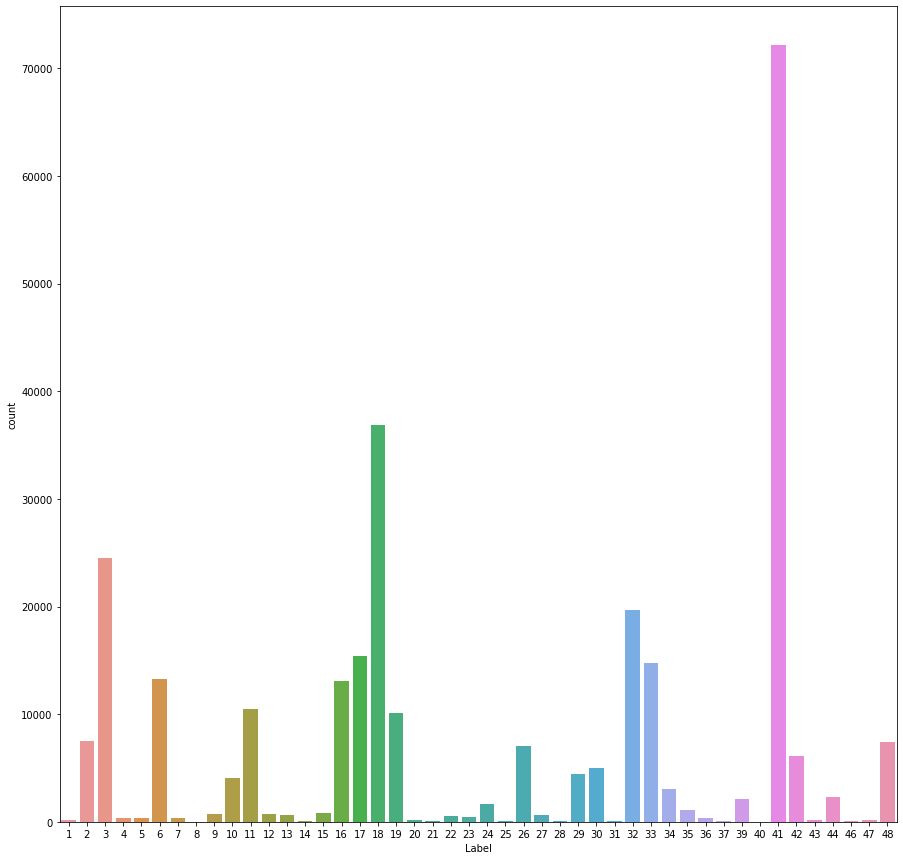

In [ ]:
plt.figure(figsize=(15, 15))

sns.countplot(data=df, x="Label")

In [ ]:
# skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
# for train_index, test_index in skf.split(X, Y):
#   #print(train_index, test_index)
#   X_train, X_validation = X[train_index], X[test_index]
#   Y_train, Y_validation = Y[train_index], Y[test_index]

In [ ]:
!mkdir clothes
%cd clothes/
!mkdir images
!mkdir labels
%cd images
!mkdir train
!mkdir val
%cd ../labels
!mkdir train
!mkdir val
%cd ../../

/content/clothes
/content/clothes/images
/content/clothes/labels
/content


In [ ]:
from tqdm import tqdm
import shutil

In [ ]:
df_concat_train_values = df_concat_train.loc[:].values

for idx in tqdm(range(len(df_concat_train_values))):
  
    shutil.copyfile(f'{df_concat_train_values[idx][0]}', f'clothes/images/train/{idx}_train.jpg')

    label = df_concat_train_values[idx][1]
    x_center = df_concat_train_values[idx][2]
    y_center = df_concat_train_values[idx][3]
    withd = df_concat_train_values[idx][4]
    height = df_concat_train_values[idx][5]

    with open(f'/content/clothes/labels/train/{idx}_train.txt', 'w') as file:
        file.write(f'{label} {x_center} {y_center} {withd} {height}')

    file.close()
  #shutil.copyfile(f'/content/gdrive/MyDrive/Libras/bbox_txt/{nome}.txt', f'libras/labels/train/{idx}_train.txt')

100%|██████████| 4800/4800 [00:00<00:00, 6016.50it/s]


In [ ]:
df_concat_test_values = df_concat_test.loc[:].values

for idx in tqdm(range(len(df_concat_test_values))):
  
    shutil.copyfile(f'{df_concat_test_values[idx][0]}', f'clothes/images/val/{idx}_val.jpg')

    label = df_concat_test_values[idx][1]
    x_center = df_concat_test_values[idx][2]
    y_center = df_concat_test_values[idx][3]
    withd = df_concat_test_values[idx][4]
    height = df_concat_test_values[idx][5]

    with open(f'/content/clothes/labels/val/{idx}_val.txt', 'w') as file:
        file.write(f'{label} {x_center} {y_center} {withd} {height}')

    file.close()

100%|██████████| 1200/1200 [00:00<00:00, 5914.61it/s]


# Yolov5

In [ ]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 14017, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14017 (delta 17), reused 27 (delta 13), pack-reused 13982
Receiving objects: 100% (14017/14017), 13.29 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (9674/9674), done.


In [ ]:
cd yolov5/

/content/yolov5


In [ ]:
!pip install -qr 'requirements.txt'  # install dependencies

     |████████████████████████████████| 1.6 MB 7.1 MB/s 


In [ ]:
#!cp /content/gdrive/MyDrive/hyp.scratch.yaml /content/yolov5/data/hyps/
!cp /content/drive/MyDrive/clothes.yaml /content/yolov5/data
!cp /content/drive/MyDrive/yolov5x.yaml /content/yolov5/models/

In [ ]:
# !python val.py --data clothes.yaml --img 640 --conf 0.5 --iou 0.5 --batch-size 1 --iou-thres 0.5

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best_clothesm.pt --source /content/drive/MyDrive/testar/

detect: weights=['/content/yolov5/runs/train/exp2/weights/best_clothesm.pt'], source=/content/drive/MyDrive/testar/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-195-gdf80e7c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/54 /content/drive/MyDrive/testar/0021-removebg-preview.png: 640x448 1 blouse, 21.9ms
image 2/54 /content/drive/MyDrive/testar/0021.jpg: 640x448 1 blouse, 21.7ms
image 3/54 /content/drive/MyDrive/testar/0048-removebg-preview.png: 640x448 1 shorts, 1 blouse, 21.7ms
image 4/54 /content/drive/MyDrive/

In [ ]:
# !cp -r /content/yolov5/runs/detect/expm /content/drive/MyDrive/

In [ ]:
!WANDB_MODE="dryrun" python train.py --img 640 --batch 12 --epochs 15 --hyp hyp.scratch-med.yaml --data /content/drive/MyDrive/clothes.yaml --cfg /content/drive/MyDrive/yolov5m.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --cache

train: weights=/content/yolov5/runs/train/exp/weights/best.pt, cfg=/content/drive/MyDrive/yolov5m.yaml, data=/content/drive/MyDrive/clothes.yaml, hyp=hyp.scratch-med.yaml, epochs=15, batch_size=12, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-195-gdf80e7c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj

In [ ]:
!cp runs/train/exp2/weights/best_clothesm.pt /content/drive/MyDrive/

In [ ]:
import matplotlib.pyplot as plt
import cv2

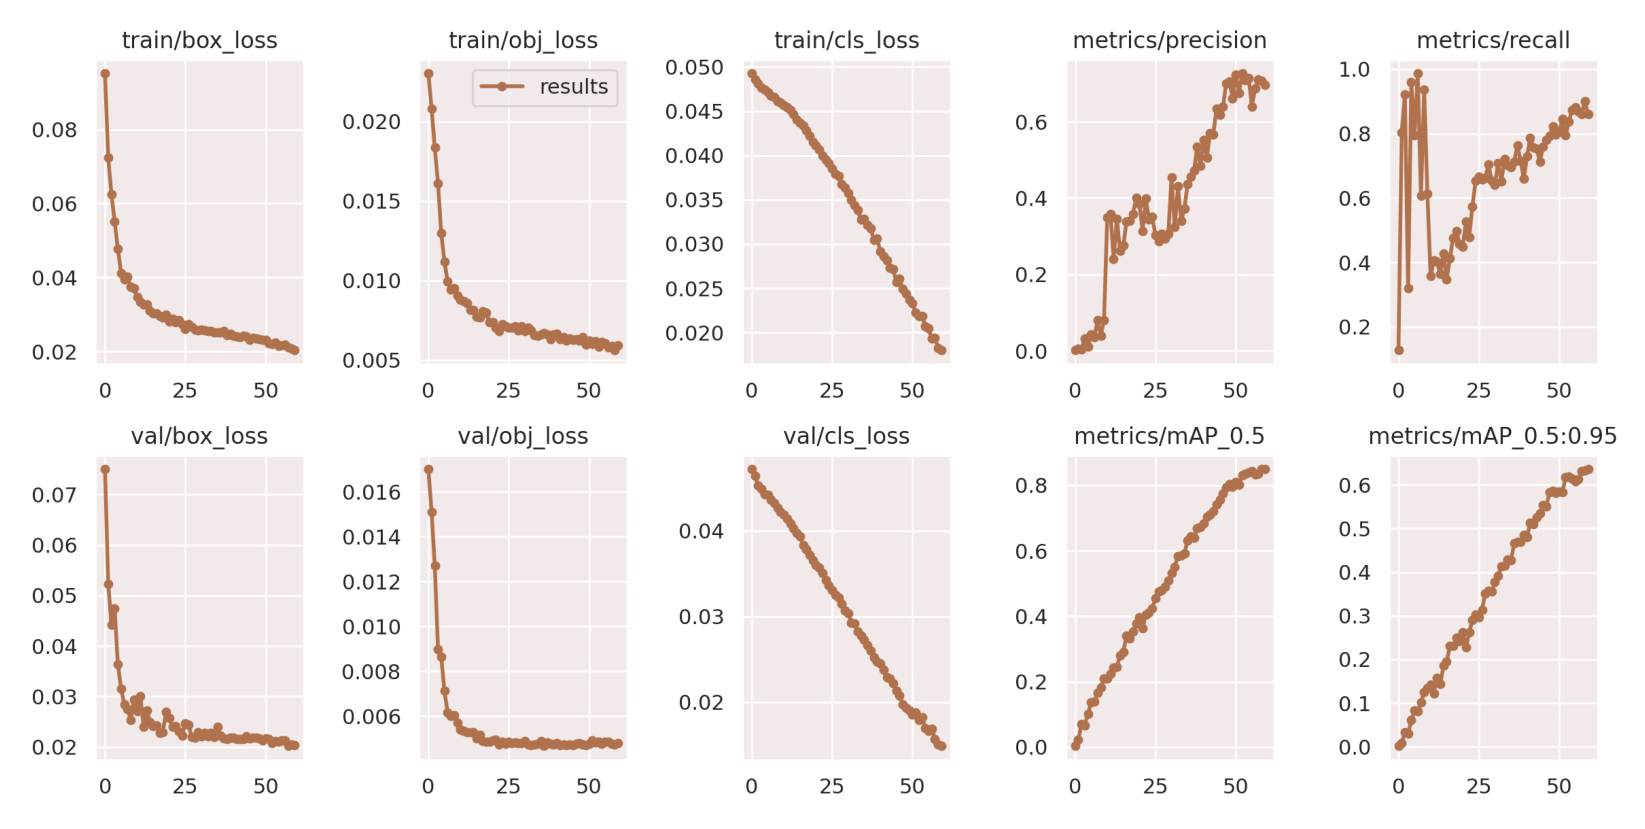

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(cv2.imread('runs/train/exp/results.png'));

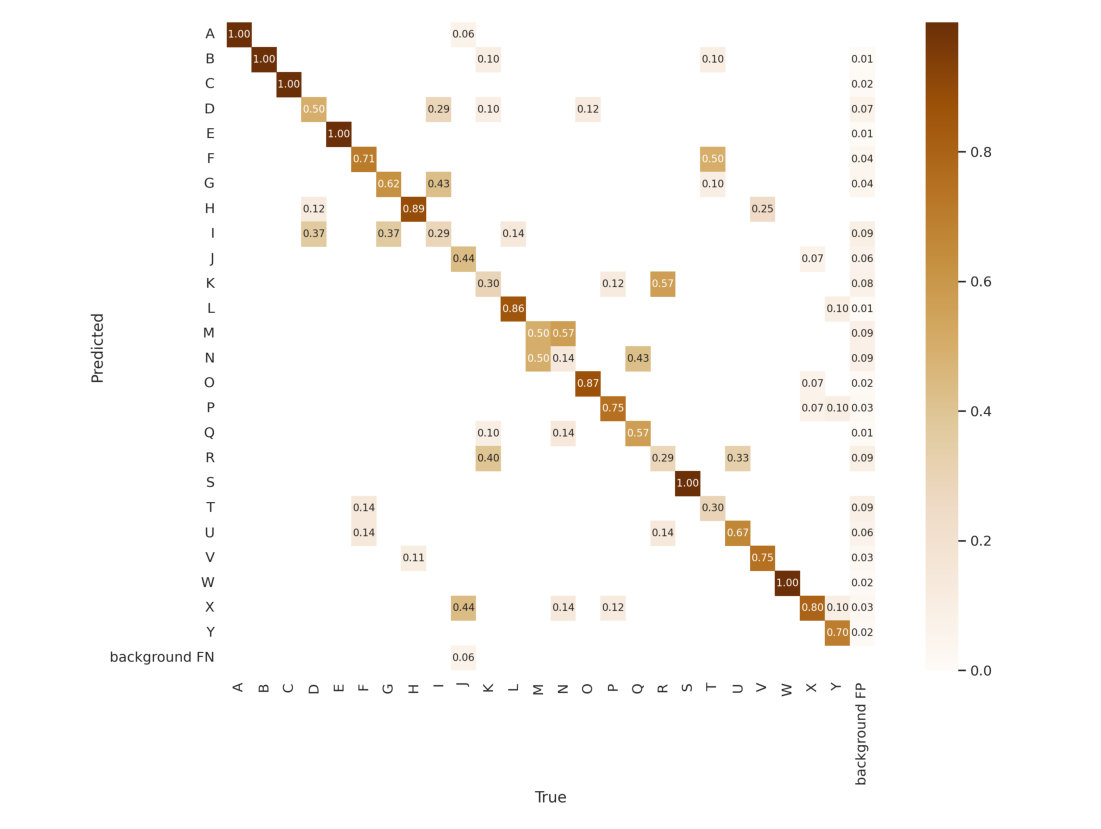

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(cv2.imread('runs/train/exp/confusion_matrix.png'));

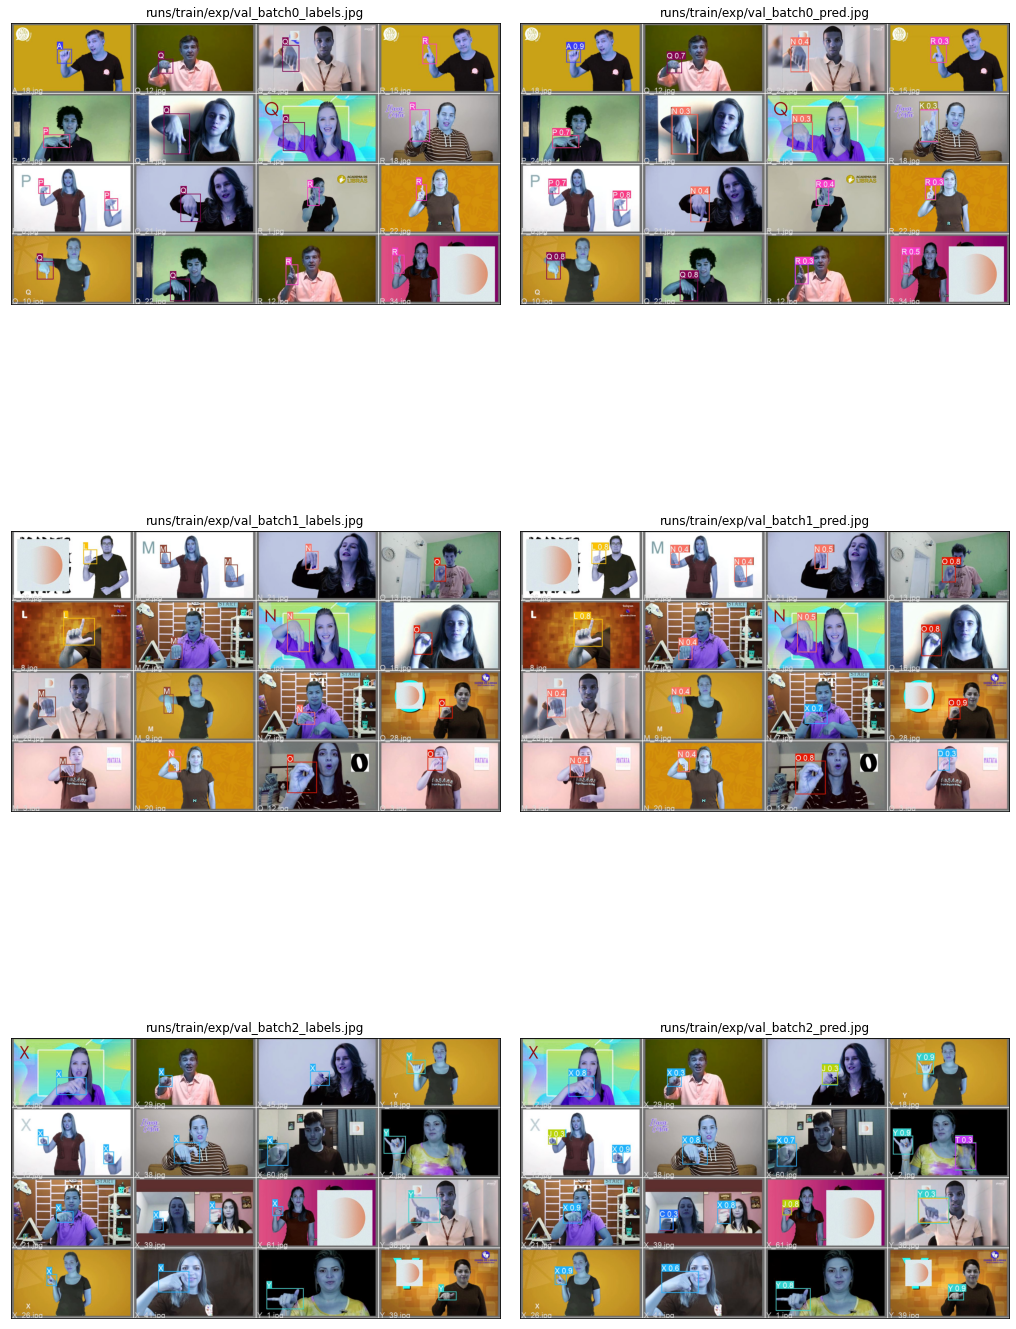

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (2*7,3*7), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(cv2.imread(f'runs/train/exp/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'runs/train/exp/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(cv2.imread(f'runs/train/exp/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'runs/train/exp/val_batch{row}_pred.jpg', fontsize = 12)

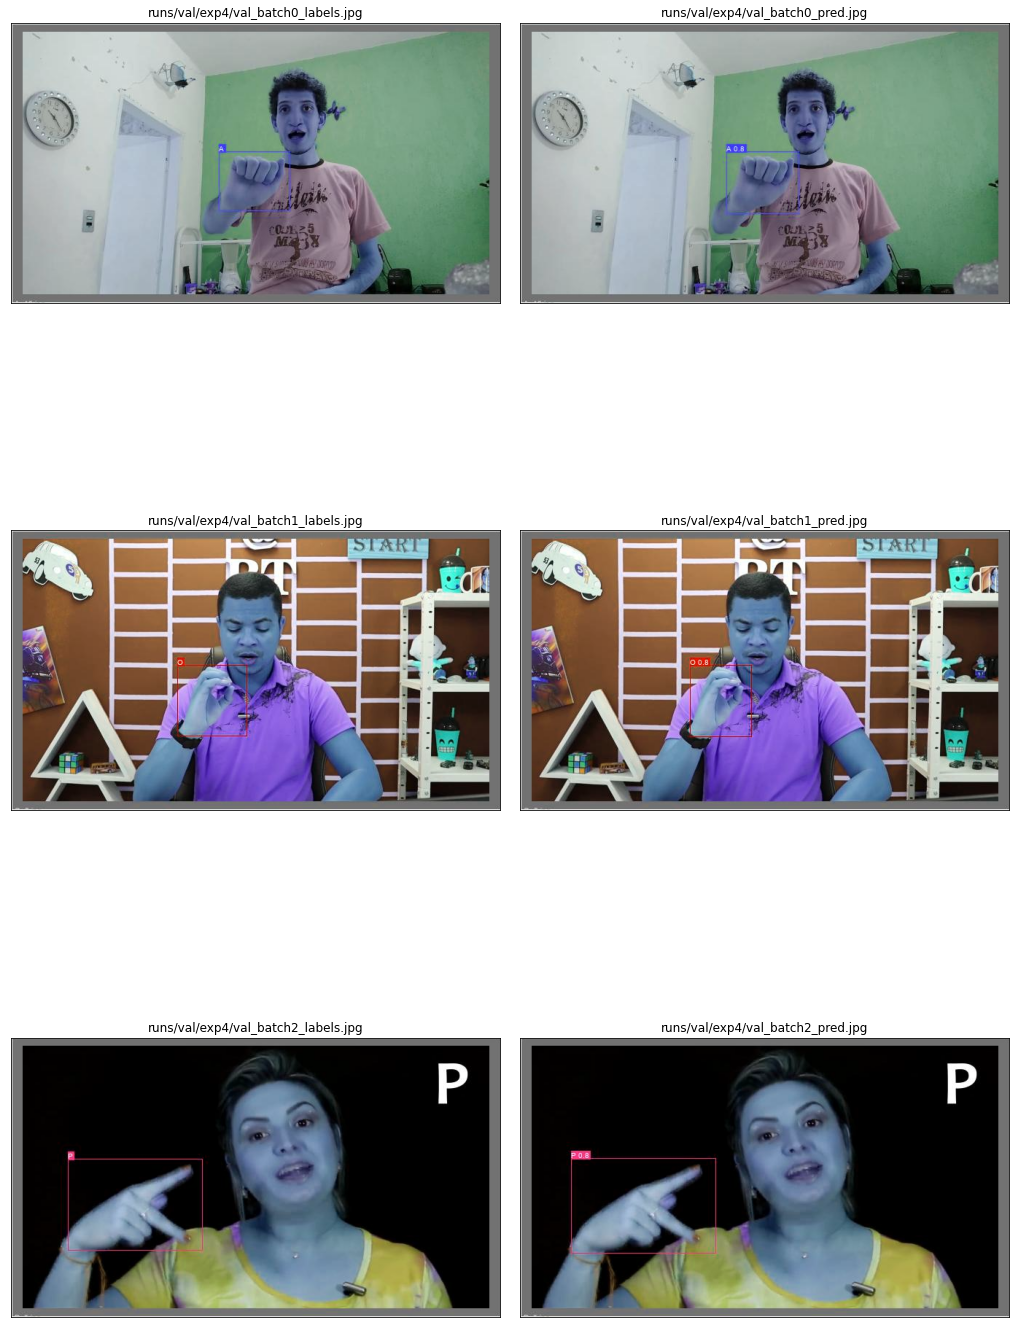

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (2*7,3*7), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(cv2.imread(f'runs/val/exp4/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'runs/val/exp4/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(cv2.imread(f'runs/val/exp4/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'runs/val/exp4/val_batch{row}_pred.jpg', fontsize = 12)

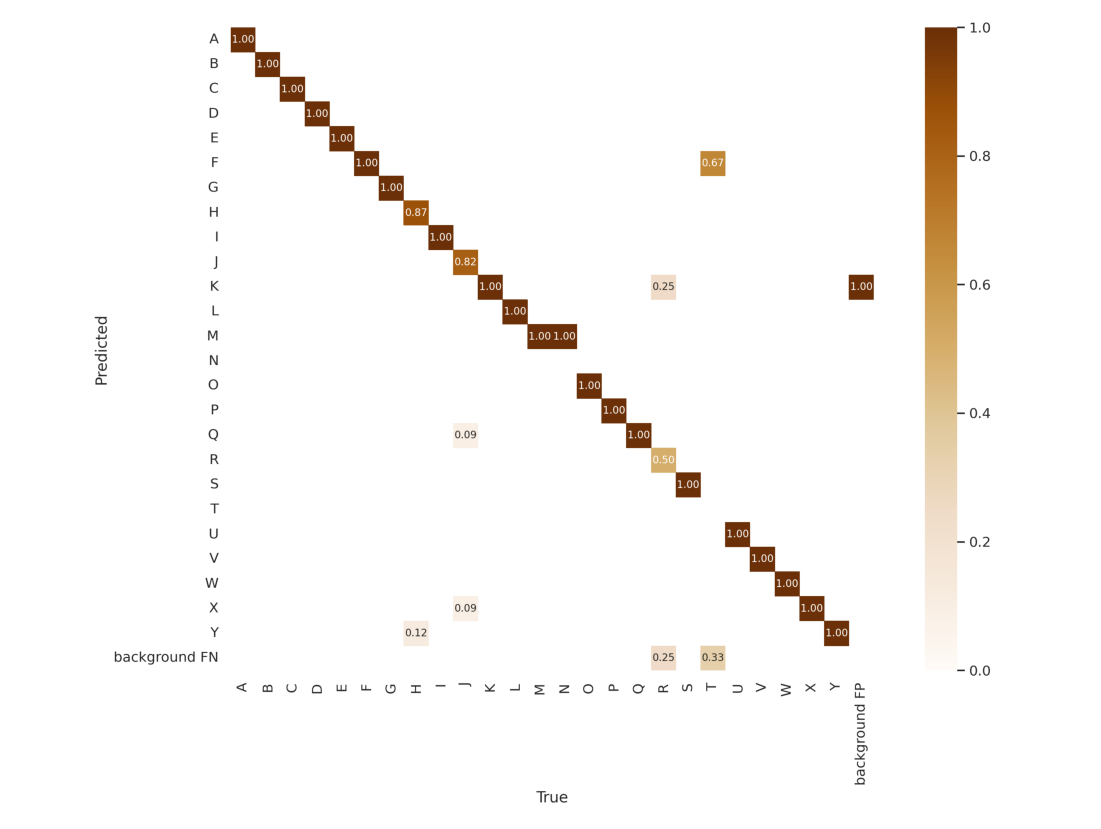

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(cv2.imread('runs/val/exp7/confusion_matrix.png'));

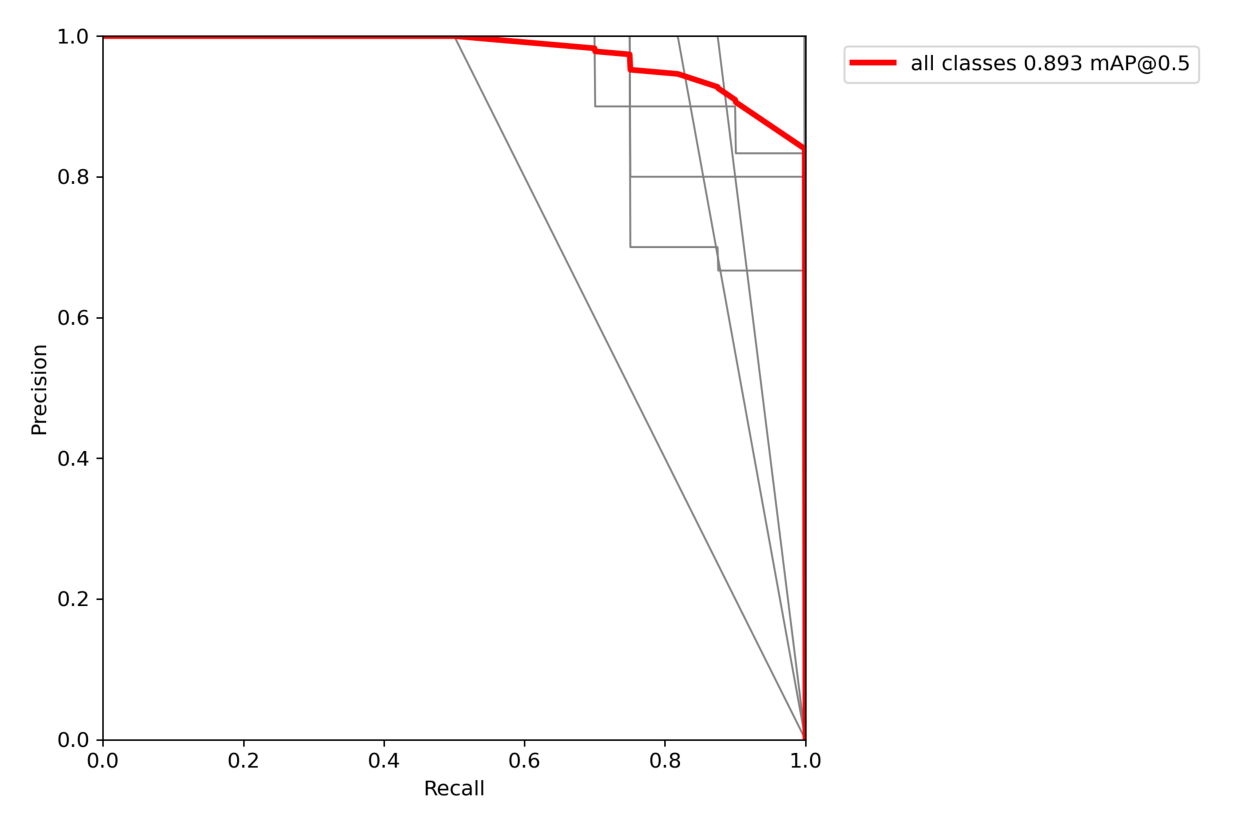

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(cv2.imread('/content/yolov5/runs/val/exp/PR_curve.png'));